In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from joblib import dump,load
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import shap
import pickle
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

E:\Anaconda\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/RDKit_descriptor.csv')
df

,ID,PCE_max(%),Jsc(mA/cm2),FF,Voc(V),J4BalabanJ_acceptor,BertzCT_acceptor,Chi0_acceptor,Chi0n_acceptor,Chi0v_acceptor,...,fr_sulfonamd_donor,fr_sulfone_donor,fr_term_acetylene_donor,fr_tetrazole_donor,fr_thiazole_donor,fr_thiocyan_donor,fr_thiophene_donor,fr_unbrch_alkane_donor,fr_urea_donor,0
0,1,6.93,0.546891,0.011455,0.585714,0.323209,0.076852,0.121638,0.113001,0.118692,...,0,0,0,0,0.0,0,0.285714,0.000000,0,0
1,2,3.09,0.343866,0.006873,0.518095,0.323209,0.077613,0.121638,0.106752,0.112443,...,0,0,0,0,0.0,0,0.285714,0.000000,0,0
2,3,8.33,0.510924,0.018709,0.514286,0.277364,0.137919,0.181204,0.170521,0.181903,...,0,0,0,0,0.0,0,0.357143,0.166667,0,0
3,4,8.67,0.467899,0.014471,0.780952,0.313467,0.085175,0.149535,0.146302,0.169067,...,0,0,0,0,0.0,0,0.357143,0.555556,0,0
4,5,8.46,0.466218,0.015311,0.723810,0.277364,0.137919,0.181204,0.170521,0.181903,...,0,0,0,0,0.0,0,0.428571,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1582,18.16,0.852101,0.021573,0.651429,0.325501,0.180397,0.241563,0.228762,0.251106,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1582,1583,10.70,0.787563,0.015197,0.486667,0.362751,0.145736,0.185124,0.174598,0.185981,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1583,1584,17.31,0.882017,0.020160,0.621905,0.378797,0.149803,0.192829,0.176808,0.188191,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0
1584,1585,17.81,0.883025,0.022069,0.589524,0.365616,0.159061,0.230089,0.218944,0.240866,...,0,0,0,0,0.0,0,0.571429,0.000000,0,0


In [3]:
X = df.iloc[:, 5:397]
Y = df.iloc[:, 1]
Y

0        6.93
1        3.09
2        8.33
3        8.67
4        8.46
        ...  
1581    18.16
1582    10.70
1583    17.31
1584    17.81
1585    18.77
Name: PCE_max(%), Length: 1586, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [5]:
import pickle
with open('../model/RDKit_ANN.pkl', 'rb') as f:
    ann_regressor = pickle.load(f)

In [6]:
ann_regressor.fit(X_train, y_train)
y_train_hat = ann_regressor.predict(X_train)
y_test_hat = ann_regressor.predict(X_test)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [7]:
np.savetxt('y_train_RDKit.csv', y_train)
np.savetxt('y_test_RDKit.csv', y_test)
np.savetxt('y_train_hat_RDKit.csv', y_train_hat)
np.savetxt('y_test_hat_RDKit.csv', y_test_hat)

In [7]:
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [8]:
PearsonCoefficient(y_test,y_test_hat)

0.7874162715919204

In [9]:
R2Score(y_test,y_test_hat)

0.6164721759863638

In [10]:
model=ann_regressor

In [11]:
explainer = shap.KernelExplainer(model.predict,X_train)

X does not have valid feature names, but MLPRegressor was fitted with feature names
Using 1268 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X_test,nsamples=318)

In [14]:
np.savetxt('shap_values_RDKit.csv', shap_values, delimiter=',')


In [12]:
shap_values = np.loadtxt('shap_values_RDKit.csv', delimiter=',')

In [13]:
expected_value = explainer.expected_value

In [14]:
feat_names1 = list(df.columns)

In [15]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 36  # 字号
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

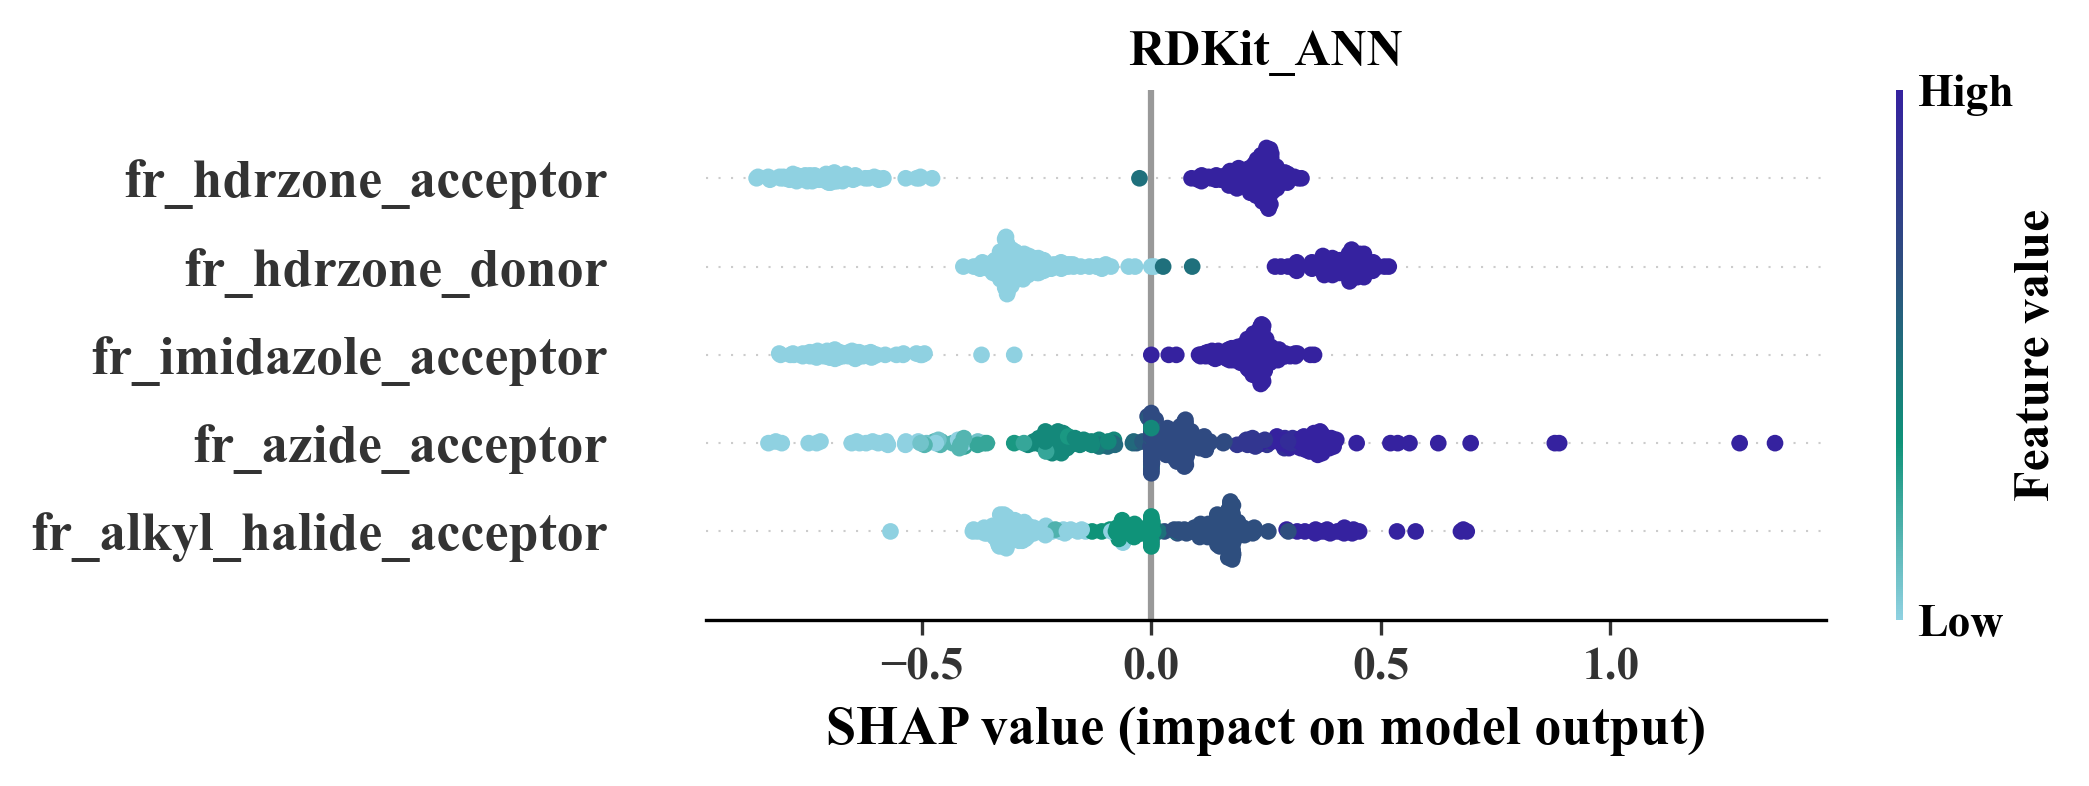

In [16]:
shap.initjs()
# 定义两种颜色
color01 = (143,209,225)
color02 = (15,147,121)
color03 = (46,78,126)
color04 = (53,34,159)

# 将颜色值转换为0-1范围
colors = [tuple([x / 255 for x in color]) for color in [color01, color02, color03, color04]]

# 创建四种颜色之间的渐变
gradient_colors = [colors[0], colors[1], colors[2], colors[3]]


# 生成颜色渐变
n = 256
newcolors = []
for color in gradient_colors:
    rgba_color = cm.colors.to_rgba(color)
    newcolors.append(rgba_color)

newcmp = cm.colors.LinearSegmentedColormap.from_list('BlueYellow', newcolors, N=n)

# 使用修改后的颜色渐变绘制图形
plt.figure()

shap.summary_plot(shap_values,X_test,feature_names = feat_names1,plot_type='dot',max_display=5,show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

plt.title(('RDKit_ANN'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_RDKit_ANN_1.tif', dpi = 300)

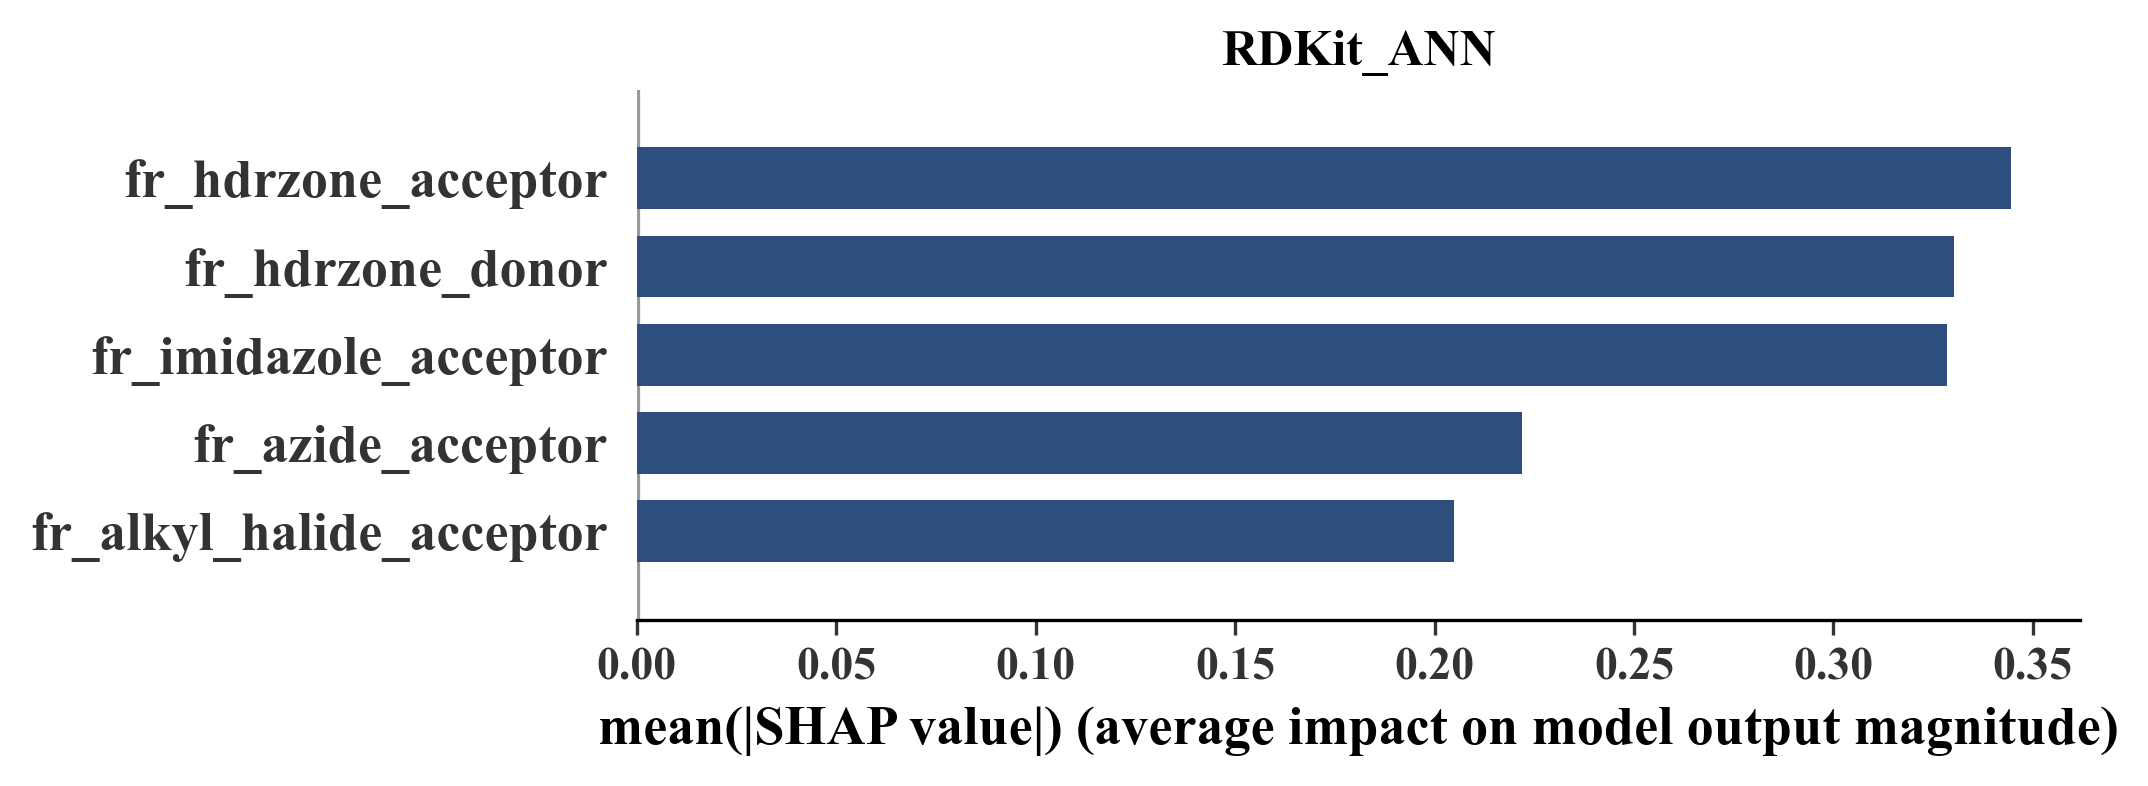

In [17]:

shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names = feat_names1,
                  plot_type = "bar",
                  show = False,
                  sort = True,
                 color="#2e4e7e",
                 max_display=5)
plt.title(('RDKit_ANN'), fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../SHAP/SHAP_RDKit_ANN_2.jpg',dpi=300)